In [26]:
%matplotlib inline

from path import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [27]:
ewa = pd.read_csv('EastWestAirlinesCluster.csv')
ewa1 = ewa.copy()
ewa.set_index('ID#', inplace = True)

In [28]:
ewa.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [29]:
len(ewa)

3999

In [30]:
# scikit-learn uses population standard deviation
ewa_df_norm = ewa.apply(preprocessing.scale, axis=0)

# compute normalized distance based on Sales and Fuel Cost
d_norm = pairwise.pairwise_distances(ewa_df_norm, metric='euclidean')
pd.DataFrame(d_norm, columns=ewa.index, index=ewa.index).head(5)

ID#,1,2,3,4,5,6,7,8,9,10,...,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021
ID#,,,,,,,,,,,,,,,,,,,,,
1,4.214685e-08,0.137432,0.376573,1.353540e-01,4.774462e+00,0.158812,3.154874,2.130186,10.292700,4.189812,...,3.460034,2.722225,4.211673,2.945887,2.732022,3.457153,3.458410,3.946996,2.760474,2.726431
2,1.374321e-01,0.000000,0.344586,1.140628e-01,4.731503e+00,0.210719,3.089847,2.115914,10.284640,4.137302,...,3.428314,2.700666,4.135785,2.888729,2.704248,3.435636,3.445578,3.929113,2.757158,2.710331
3,3.765730e-01,0.344586,0.000000,4.373367e-01,4.532809e+00,0.515641,2.831232,2.106062,10.111797,3.918964,...,3.453159,2.748558,3.997893,2.868347,2.761392,3.449612,3.438935,3.859247,2.788777,2.792381
4,1.353540e-01,0.114063,0.437337,4.214685e-08,4.790346e+00,0.107532,3.176533,2.128322,10.346372,4.212090,...,3.434434,2.693177,4.200358,2.919783,2.700419,3.436483,3.456478,3.944931,2.753645,2.694373
5,4.774462e+00,4.731503,4.532809,4.790346e+00,5.960464e-08,4.852593,2.930207,3.923133,8.384312,1.209658,...,4.841909,5.385830,4.129251,5.045738,5.413619,4.721293,4.819044,3.890846,5.311696,5.565126


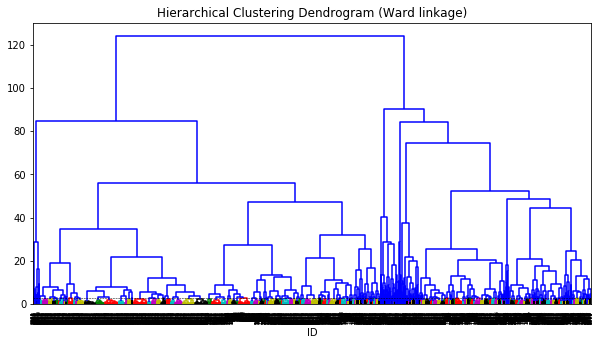

In [31]:
Z = linkage(ewa_df_norm, method='ward')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('ID')
dendrogram(Z, labels=ewa_df_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

If not normalized, variables with larger scales will have a greater influence over the total distance

In [32]:
memb = fcluster(linkage(ewa_df_norm, 'ward'), 5, criterion='maxclust')
memb = pd.Series(memb, index=ewa_df_norm.index)
#for key, item in memb.groupby(memb):
    #print(key, ': ', ', '.join(item.index))

In [33]:
ewa_df_norm.groupby(memb).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
1,-0.046890,-0.156236,-0.668227,9.038254,-0.062767,-0.101665,0.617851,0.087549,0.220347,-0.072464,0.051784
2,-0.270655,-0.174627,-0.592297,-0.098242,-0.062767,-0.508397,-0.488856,-0.175169,-0.184523,-0.169125,-0.385093
3,0.608155,0.322155,0.269661,-0.098242,-0.062767,0.804926,1.847056,3.896667,4.024804,0.232967,0.794174
4,0.559233,-0.101411,0.965591,-0.098242,13.881875,2.862150,1.522536,-0.027023,-0.010615,0.179293,0.268499
5,0.422108,0.289135,1.046296,-0.098242,-0.062767,0.801579,0.662006,-0.059751,-0.059592,0.281411,0.610598


What name can we give these clusters based on their cluster centroid?

In [40]:
#use a random sample of 95% of the records
ewa1 = ewa1.sample(frac=0.95)

In [41]:
len(ewa1)

3798

In [43]:
ewa1.set_index('ID#', inplace = True)

# scikit-learn uses population standard deviation
ewa1_df_norm = ewa1.apply(preprocessing.scale, axis=0)

# compute normalized distance based on Sales and Fuel Cost
d_norm = pairwise.pairwise_distances(ewa1_df_norm, metric='euclidean')
pd.DataFrame(d_norm, columns=ewa1.index, index=ewa1.index).head(5)

ID#,1058,3514,2159,3569,1789,825,1253,1912,3196,186,...,2360,3431,1433,1113,2267,2468,1495,3832,2666,984
ID#,,,,,,,,,,,,,,,,,,,,,
1058,0.000000,4.976904,1.097038e+01,5.171653,1.846523,3.822560,5.128644,4.166614,5.044391,4.492843,...,4.457786,4.813146,2.021942,2.891882,3.277989,7.653563,4.451011,4.913475,4.323911,3.476766
3514,4.976904,0.000000,1.007387e+01,3.171109,3.533144,3.421512,4.332468,3.035842,2.188055,3.012157,...,1.145526,2.733032,4.466076,2.820711,2.680110,6.599374,1.760208,0.137727,3.003024,2.501738
2159,10.970378,10.073869,1.685874e-07,10.610430,10.479205,10.348299,10.719041,10.333243,10.248782,10.128120,...,9.995726,10.429307,10.778599,10.198918,9.120369,11.939849,9.995381,10.056755,10.441046,10.107456
3569,5.171653,3.171109,1.061043e+01,0.000000,3.638988,4.161004,4.778381,3.193678,3.627442,4.562521,...,3.195246,0.631234,3.867342,3.573770,2.939237,6.897826,3.809753,3.190524,2.731289,3.349165
1789,1.846523,3.533144,1.047920e+01,3.638988,0.000000,2.940784,4.263590,2.712380,3.723269,3.437027,...,2.994686,3.222765,1.293147,1.399807,1.751316,6.946798,3.140274,3.469771,3.029673,2.040260


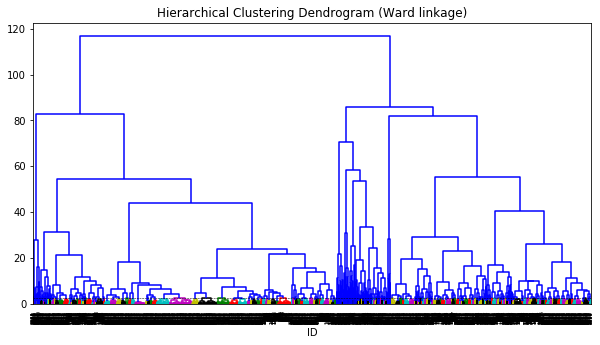

In [44]:
Z = linkage(ewa1_df_norm, method='ward')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('ID')
dendrogram(Z, labels=ewa1_df_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [45]:
memb = fcluster(linkage(ewa1_df_norm, 'ward'), 5, criterion='maxclust')
memb = pd.Series(memb, index=ewa1_df_norm.index)
#for key, item in memb.groupby(memb):
    #print(key, ': ', ', '.join(item.index))

In [46]:
ewa1_df_norm.groupby(memb).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
1,-0.006781,-0.153828,-0.659761,9.133745,-0.062506,-0.081124,0.654920,0.122218,0.275639,-0.087025,0.015427
2,-0.317014,-0.081903,-0.691939,-0.097219,-0.062506,-0.562898,-0.627332,-0.233883,-0.247643,-0.160967,-0.337085
3,1.105414,1.108265,0.034709,-0.097219,-0.062506,0.500326,0.845232,1.964512,2.079376,0.172768,0.661731
4,0.619159,-0.095801,0.941511,-0.097219,13.902063,2.839207,1.476261,-0.030311,-0.013668,0.139763,0.213685
5,0.178171,-0.157722,1.023928,-0.097219,-0.062506,0.672525,0.674781,-0.161448,-0.175275,0.194920,0.326312


The second dendrogram is different from the first so the same picture does not emerge.

In [49]:
# Normalized distance
ewa1_df_norm = ewa1.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=6, random_state=0).fit(ewa1_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=ewa1_df_norm.index)
#for key, item in memb.groupby(memb):
   # print(key, ': ', ', '.join(item.index))

In [50]:
ewa1_df_norm.groupby(kmeans.labels_).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.442488,-0.109205,1.188143,-0.097219,-0.053706,0.912463,0.751977,-0.072435,-0.075648,0.379138,0.574815
1,-0.299698,-0.132599,-0.607605,-0.097219,-0.060273,-0.522372,-0.497028,-0.176865,-0.191389,-0.203789,-0.350697
2,1.161117,0.411577,0.234421,-0.097219,-0.062506,0.812246,1.841049,3.973027,4.216682,0.246948,0.917481
3,0.718540,-0.076386,0.996486,-0.097219,15.764005,3.171316,1.670206,0.032414,0.060557,0.195587,0.274687
4,-0.006781,-0.153828,-0.659761,9.133745,-0.062506,-0.081124,0.654920,0.122218,0.275639,-0.087025,0.015427
5,0.448522,6.585089,-0.077661,-0.097219,-0.062506,0.014552,0.008377,0.306608,0.342005,-0.035576,0.393692


For Kmeans clustering, the same picture does not emerge as above.

Which clusters would you target for offers, and what types of offers would you target to customers in that cluster